In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

In [2]:
train = pd.read_csv("train/train.csv")
game_overview = pd.read_csv("train/game_overview.csv")

In [5]:
train.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        17494 non-null  int64  
 1   title            17494 non-null  object 
 2   year             17316 non-null  float64
 3   user_review      17494 non-null  object 
 4   user_suggestion  17494 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 683.5+ KB


In [7]:
game_overview.head()

,title,developer,publisher,tags,overview
0,Spooky's Jump Scare Mansion,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,Sakura Clicker,Winged Cloud,Winged Cloud,"['Nudity', 'Anime', 'Free to Play', 'Mature', ...",The latest entry in the Sakura series is more ...
2,WARMODE,WARTEAM,WARTEAM,"['Early Access', 'Free to Play', 'FPS', 'Multi...",Free to play shooter about the confrontation o...
3,Fractured Space,Edge Case Games Ltd.,Edge Case Games Ltd.,"['Space', 'Multiplayer', 'Free to Play', 'PvP'...",Take the helm of a gigantic capital ship and g...
4,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...",Counter-Strike: Global Offensive (CS: GO) expa...


In [8]:
game_overview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      64 non-null     object
 1   developer  64 non-null     object
 2   publisher  64 non-null     object
 3   tags       64 non-null     object
 4   overview   64 non-null     object
dtypes: object(5)
memory usage: 2.6+ KB


In [9]:
train.isnull().sum()

review_id            0
title                0
year               178
user_review          0
user_suggestion      0
dtype: int64

In [15]:
train[train["year"].isnull()]["user_suggestion"].value_counts()

0    97
1    81
Name: user_suggestion, dtype: int64

In [18]:
train[train["year"].isnull()]['title'].value_counts()

Ring of Elysium                                       24
War Thunder                                           17
Bless Online                                          12
Realm Royale                                          11
Eternal Card Game                                     11
Cuisine Royale                                         9
Heroes & Generals                                      8
Bloons TD Battles                                      7
The Elder Scrolls®: Legends™                           7
Yu-Gi-Oh! Duel Links                                   7
DCS World Steam Edition                                6
Creativerse                                            6
World of Tanks Blitz                                   5
Team Fortress 2                                        5
AdventureQuest 3D                                      5
Dota 2                                                 5
Tactical Monsters Rumble Arena                         4
Brawlhalla                     

In [32]:
merged_data = train.merge(game_overview, how='left', left_on='title', right_on='title')

In [33]:
merged_data.head()

,review_id,title,year,user_review,user_suggestion,developer,publisher,tags,overview
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...


In [24]:
merged_data['year'].value_counts()

2018.0    4822
2016.0    4226
2017.0    3890
2015.0    2460
2014.0    1499
2013.0     340
2012.0      65
2011.0      14
Name: year, dtype: int64

In [25]:
merged_data[merged_data['title'] == 'Ring of Elysium']['year'].value_counts()

2018.0    395
Name: year, dtype: int64

In [26]:
merged_data[merged_data['title'] == 'Ring of Elysium']['user_suggestion'].value_counts()

1    367
0     52
Name: user_suggestion, dtype: int64

In [44]:
mask = (merged_data['title'] == 'Ring of Elysium') & merged_data['year'].isnull()

In [46]:
merged_data.loc[mask, 'date'] = 2018.0

In [52]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                                           17
Bless Online                                          12
Realm Royale                                          11
Eternal Card Game                                     11
Cuisine Royale                                         9
Heroes & Generals                                      8
Bloons TD Battles                                      7
The Elder Scrolls®: Legends™                           7
Yu-Gi-Oh! Duel Links                                   7
Creativerse                                            6
DCS World Steam Edition                                6
Team Fortress 2                                        5
Dota 2                                                 5
AdventureQuest 3D                                      5
World of Tanks Blitz                                   5
Tactical Monsters Rumble Arena                         4
Path of Exile                                          3
RaceRoom Racing Experience     

In [51]:
merged_data.loc[mask, 'year'] = 2018.0

In [53]:
merged_data[merged_data['title'] == 'War Thunder']['year'].value_counts()

2018.0    233
2016.0    192
2017.0    114
2015.0     90
2014.0     48
2013.0     26
Name: year, dtype: int64

In [58]:
merged_data.loc[(merged_data['title'] == 'War Thunder') & merged_data['year'].isnull()]

,review_id,title,year,user_review,user_suggestion,developer,publisher,tags,overview,date
2601,3065,War Thunder,NaN,what it used to be;The entire system is design...,0,Gaijin Entertainment,Gaijin Entertainment,"['Free to Play', 'World War II', 'Multiplayer'...",War Thunder is the most comprehensive free-to-...,NaN
2640,3104,War Thunder,NaN,was a good game at one point. it is mostly now...,0,Gaijin Entertainment,Gaijin Entertainment,"['Free to Play', 'World War II', 'Multiplayer'...",War Thunder is the most comprehensive free-to-...,NaN
2652,3116,War Thunder,NaN,would never recommend this game to anyone ! Th...,0,Gaijin Entertainment,Gaijin Entertainment,"['Free to Play', 'World War II', 'Multiplayer'...",War Thunder is the most comprehensive free-to-...,NaN
2658,3122,War Thunder,NaN,feel like this game has grown very stale. This...,0,Gaijin Entertainment,Gaijin Entertainment,"['Free to Play', 'World War II', 'Multiplayer'...",War Thunder is the most comprehensive free-to-...,NaN
2782,3246,War Thunder,NaN,dont usually post reviews but I felt its worth...,0,Gaijin Entertainment,Gaijin Entertainment,"['Free to Play', 'World War II', 'Multiplayer'...",War Thunder is the most comprehensive free-to-...,NaN
2785,3249,War Thunder,NaN,"thunder, where to start. (please read fully, ...",0,Gaijin Entertainment,Gaijin Entertainment,"['Free to Play', 'World War II', 'Multiplayer'...",War Thunder is the most comprehensive free-to-...,NaN
2792,3256,War Thunder,NaN,"off its true this game has premium planes, shi...",1,Gaijin Entertainment,Gaijin Entertainment,"['Free to Play', 'World War II', 'Multiplayer'...",War Thunder is the most comprehensive free-to-...,NaN
2905,3369,War Thunder,NaN,few years back (2012) when I started playing t...,0,Gaijin Entertainment,Gaijin Entertainment,"['Free to Play', 'World War II', 'Multiplayer'...",War Thunder is the most comprehensive free-to-...,NaN
2934,3398,War Thunder,NaN,game used to be fun but has turned into an end...,0,Gaijin Entertainment,Gaijin Entertainment,"['Free to Play', 'World War II', 'Multiplayer'...",War Thunder is the most comprehensive free-to-...,NaN
2944,3408,War Thunder,NaN,"I´ve played this game for quite some time now,...",0,Gaijin Entertainment,Gaijin Entertainment,"['Free to Play', 'World War II', 'Multiplayer'...",War Thunder is the most comprehensive free-to-...,NaN


In [64]:
merged_data[merged_data['title'] == 'War Thunder']

,review_id,title,year,user_review,user_suggestion,developer,publisher,tags,overview,date
2465,2929,War Thunder,2018.0,"Oh joy, War Thunder. There's so much that can ...",0,Gaijin Entertainment,Gaijin Entertainment,"['Free to Play', 'World War II', 'Multiplayer'...",War Thunder is the most comprehensive free-to-...,NaN
2466,2930,War Thunder,2018.0,"You can see a lot of effort behind the engine,...",0,Gaijin Entertainment,Gaijin Entertainment,"['Free to Play', 'World War II', 'Multiplayer'...",War Thunder is the most comprehensive free-to-...,NaN
2467,2931,War Thunder,2018.0,Devs more interested in money than the players...,0,Gaijin Entertainment,Gaijin Entertainment,"['Free to Play', 'World War II', 'Multiplayer'...",War Thunder is the most comprehensive free-to-...,NaN
2468,2932,War Thunder,2018.0,As someone who has played this game for not ve...,0,Gaijin Entertainment,Gaijin Entertainment,"['Free to Play', 'World War II', 'Multiplayer'...",War Thunder is the most comprehensive free-to-...,NaN
2469,2933,War Thunder,2018.0,I wish there was a 'maybe' option for recommen...,0,Gaijin Entertainment,Gaijin Entertainment,"['Free to Play', 'World War II', 'Multiplayer'...",War Thunder is the most comprehensive free-to-...,NaN
2470,2934,War Thunder,2018.0,"The game is not bad, the grind is. But this is...",0,Gaijin Entertainment,Gaijin Entertainment,"['Free to Play', 'World War II', 'Multiplayer'...",War Thunder is the most comprehensive free-to-...,NaN
2471,2935,War Thunder,2018.0,"360 Hours on steam, and thousands on the stand...",0,Gaijin Entertainment,Gaijin Entertainment,"['Free to Play', 'World War II', 'Multiplayer'...",War Thunder is the most comprehensive free-to-...,NaN
2472,2936,War Thunder,2018.0,"Repair costs are way too expensive, for exempl...",0,Gaijin Entertainment,Gaijin Entertainment,"['Free to Play', 'World War II', 'Multiplayer'...",War Thunder is the most comprehensive free-to-...,NaN
2473,2937,War Thunder,2018.0,I love this game to death. It's an amazing gam...,0,Gaijin Entertainment,Gaijin Entertainment,"['Free to Play', 'World War II', 'Multiplayer'...",War Thunder is the most comprehensive free-to-...,NaN
2474,2938,War Thunder,2018.0,"This game used to be fantastic, but sadly as t...",0,Gaijin Entertainment,Gaijin Entertainment,"['Free to Play', 'World War II', 'Multiplayer'...",War Thunder is the most comprehensive free-to-...,NaN


In [67]:
pd.crosstab(merged_data['year'], merged_data['user_suggestion'])

user_suggestion,0,1
year,,
2011.0,1,13
2012.0,2,63
2013.0,66,274
2014.0,568,931
2015.0,722,1738
2016.0,2086,2140
2017.0,1583,2307
2018.0,2414,2432


In [68]:
merged_data.loc[(merged_data['title'] == 'Bless Online') & merged_data['year'].isnull()]

,review_id,title,year,user_review,user_suggestion,developer,publisher,tags,overview,date
11761,17258,Bless Online,NaN,game. Poor optimization. They also refused to ...,0,NEOWIZ BLESS STUDIO,NEOWIZ,"['MMORPG', 'Open World', 'Massively Multiplaye...",“We invite you all to the world of Bless Onlin...,NaN
11832,17329,Bless Online,NaN,to 1 hour and dont get the game running. Nothi...,0,NEOWIZ BLESS STUDIO,NEOWIZ,"['MMORPG', 'Open World', 'Massively Multiplaye...",“We invite you all to the world of Bless Onlin...,NaN
11833,17330,Bless Online,NaN,game was a really good idea and had a lot of p...,0,NEOWIZ BLESS STUDIO,NEOWIZ,"['MMORPG', 'Open World', 'Massively Multiplaye...",“We invite you all to the world of Bless Onlin...,NaN
11856,17353,Bless Online,NaN,rarely write reviews but this time I really fe...,1,NEOWIZ BLESS STUDIO,NEOWIZ,"['MMORPG', 'Open World', 'Massively Multiplaye...",“We invite you all to the world of Bless Onlin...,NaN
11900,17397,Bless Online,NaN,all.I normaly dont put up reviews. But in some...,0,NEOWIZ BLESS STUDIO,NEOWIZ,"['MMORPG', 'Open World', 'Massively Multiplaye...",“We invite you all to the world of Bless Onlin...,NaN
12019,17516,Bless Online,NaN,game is just average it feels like a combinati...,0,NEOWIZ BLESS STUDIO,NEOWIZ,"['MMORPG', 'Open World', 'Massively Multiplaye...",“We invite you all to the world of Bless Onlin...,NaN
12027,17524,Bless Online,NaN,online may not have lived up to the hype but I...,1,NEOWIZ BLESS STUDIO,NEOWIZ,"['MMORPG', 'Open World', 'Massively Multiplaye...",“We invite you all to the world of Bless Onlin...,NaN
12117,17614,Bless Online,NaN,"is NOT EVEN worth "" Free2Play ""*-THE GAME IS V...",0,NEOWIZ BLESS STUDIO,NEOWIZ,"['MMORPG', 'Open World', 'Massively Multiplaye...",“We invite you all to the world of Bless Onlin...,NaN
12123,17620,Bless Online,NaN,was so hyped for this game after seeing the re...,0,NEOWIZ BLESS STUDIO,NEOWIZ,"['MMORPG', 'Open World', 'Massively Multiplaye...",“We invite you all to the world of Bless Onlin...,NaN
12164,17661,Bless Online,NaN,"even get through the tutorial, too annoying.I ...",0,NEOWIZ BLESS STUDIO,NEOWIZ,"['MMORPG', 'Open World', 'Massively Multiplaye...",“We invite you all to the world of Bless Onlin...,NaN


In [69]:
merged_data[merged_data['title'] == 'Bless Online']['year'].value_counts()

2018.0    700
Name: year, dtype: int64

In [70]:
mask = (merged_data['title'] == 'Bless Online') & merged_data['year'].isnull()
merged_data.loc[mask, 'year'] = 2018.0

In [72]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                                           17
Realm Royale                                          11
Eternal Card Game                                     11
Cuisine Royale                                         9
Heroes & Generals                                      8
Bloons TD Battles                                      7
The Elder Scrolls®: Legends™                           7
Yu-Gi-Oh! Duel Links                                   7
Creativerse                                            6
DCS World Steam Edition                                6
World of Tanks Blitz                                   5
Team Fortress 2                                        5
Dota 2                                                 5
AdventureQuest 3D                                      5
Tactical Monsters Rumble Arena                         4
RaceRoom Racing Experience                             3
Path of Exile                                          3
SMITE®                         

In [73]:
merged_data[merged_data['title'] == 'Realm Royale']['year'].value_counts()

2018.0    431
Name: year, dtype: int64

In [74]:
mask = (merged_data['title'] == 'Realm Royale') & merged_data['year'].isnull()
merged_data.loc[mask, 'year'] = 2018.0

In [75]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                                           17
Eternal Card Game                                     11
Cuisine Royale                                         9
Heroes & Generals                                      8
Yu-Gi-Oh! Duel Links                                   7
Bloons TD Battles                                      7
The Elder Scrolls®: Legends™                           7
Creativerse                                            6
DCS World Steam Edition                                6
World of Tanks Blitz                                   5
Team Fortress 2                                        5
Dota 2                                                 5
AdventureQuest 3D                                      5
Tactical Monsters Rumble Arena                         4
Brawlhalla                                             3
Path of Exile                                          3
RaceRoom Racing Experience                             3
SMITE®                         

In [76]:
merged_data[merged_data['title'] == 'Eternal Card Game']['year'].value_counts()

2018.0    346
2017.0    338
2016.0     96
Name: year, dtype: int64

In [77]:
merged_data[merged_data['title'] == 'Cuisine Royale']['year'].value_counts()

2018.0    390
Name: year, dtype: int64

In [78]:
mask = (merged_data['title'] == 'Cuisine Royale') & merged_data['year'].isnull()
merged_data.loc[mask, 'year'] = 2018.0

In [87]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                                           17
Eternal Card Game                                     11
Heroes & Generals                                      8
The Elder Scrolls®: Legends™                           7
Bloons TD Battles                                      7
Yu-Gi-Oh! Duel Links                                   7
DCS World Steam Edition                                6
Creativerse                                            6
Dota 2                                                 5
AdventureQuest 3D                                      5
Team Fortress 2                                        5
World of Tanks Blitz                                   5
Tactical Monsters Rumble Arena                         4
Brawlhalla                                             3
Path of Exile                                          3
SMITE®                                                 3
RaceRoom Racing Experience                             3
Trove                          

In [80]:
merged_data[merged_data['title'] == 'Heroes & Generals']['year'].value_counts()

2016.0    227
2015.0    190
2017.0    175
2018.0     81
2014.0     64
Name: year, dtype: int64

In [81]:
merged_data[merged_data['title'] == 'The Elder Scrolls®: Legends™']['year'].value_counts()

2017.0    397
2018.0    161
Name: year, dtype: int64

In [82]:
merged_data[merged_data['title'] == 'Bloons TD Battles']['year'].value_counts()

2016.0    117
2017.0     65
2018.0     44
Name: year, dtype: int64

In [83]:
merged_data[merged_data['title'] == 'Yu-Gi-Oh! Duel Links']['year'].value_counts()

2018.0    244
2017.0    148
Name: year, dtype: int64

In [84]:
merged_data[merged_data['title'] == 'DCS World Steam Edition']['year'].value_counts()

2018.0    141
2016.0    120
2017.0     94
2015.0     63
2014.0     54
2013.0     10
Name: year, dtype: int64

In [85]:
merged_data[merged_data['title'] == 'Creativerse']['year'].value_counts()

2017.0    213
2016.0    136
2018.0     85
2015.0     50
2014.0      2
Name: year, dtype: int64

In [88]:
merged_data['title'].unique()

array(["Spooky's Jump Scare Mansion", 'Sakura Clicker', 'WARMODE',
       'Fractured Space', 'Dota 2', 'Path of Exile', 'War Thunder',
       'Ring of Elysium', 'Team Fortress 2', 'Yu-Gi-Oh! Duel Links',
       'SMITE®', 'Brawlhalla', 'World of Tanks Blitz',
       'DCS World Steam Edition', 'Heroes & Generals',
       'The Elder Scrolls®: Legends™', 'Trove', 'Neverwinter',
       'Realm Royale', 'PlanetSide 2', 'Realm of the Mad God', 'Elsword',
       'theHunter Classic', 'Eternal Card Game', 'Black Squad',
       'Freestyle 2: Street Basketball', 'Bless Online',
       'RaceRoom Racing Experience', 'Fallout Shelter',
       'Tactical Monsters Rumble Arena', 'Creativerse', 'Dreadnought',
       'Infestation: The New Z', 'Shop Heroes', 'Robocraft',
       'Business Tour - Board Game with Online Multiplayer',
       'Crusaders of the Lost Idols', 'AdventureQuest 3D',
       'Realm Grinder', 'World of Guns: Gun Disassembly',
       'Bloons TD Battles', 'Cuisine Royale', 'School of Drago

In [116]:
list_title_year = []
for i in merged_data['title'].unique():
    a = i, merged_data[merged_data['title'] == i]['year'].value_counts()
    list_title_year.append(a)
    

In [122]:
import csv
with open("out.csv","w") as f:
    wr = csv.writer(f,delimiter="\n")
    wr.writerow(list_title_year)

In [91]:
from scipy.stats import chi2_contingency

In [97]:
year_ct = pd.crosstab(merged_data['year'], merged_data['user_suggestion'])
year_ct.iloc[0].values

array([ 1, 13], dtype=int64)

In [98]:
(chi2, p, dof, _) = chi2_contingency([year_ct.iloc[0].values, year_ct.iloc[1].values, year_ct.iloc[2].values, year_ct.iloc[3].values, year_ct.iloc[4].values,
                year_ct.iloc[5].values, year_ct.iloc[6].values, year_ct.iloc[7].values])

In [99]:
print('chi2 : ', chi2)
print('p-value : ', p)
print('Degree of Freedom : ', dof)

chi2 :  501.68267191693485
p-value :  3.4853479698283237e-104
Degree of Freedom :  7


In [100]:
year_ct = pd.crosstab(merged_data['user_suggestion'], merged_data['year'])
(chi2, p, dof, _) = chi2_contingency([year_ct.iloc[0].values, year_ct.iloc[1].values])
print('chi2 : ', chi2)
print('p-value : ', p)
print('Degree of Freedom : ', dof)                                

chi2 :  501.68267191693485
p-value :  3.4853479698283237e-104
Degree of Freedom :  7


In [101]:
pd.crosstab(merged_data['year'], merged_data['user_suggestion'])

user_suggestion,0,1
year,,
2011.0,1,13
2012.0,2,63
2013.0,66,274
2014.0,568,931
2015.0,722,1738
2016.0,2086,2140
2017.0,1583,2307
2018.0,2432,2446


In [102]:
merged_data[(merged_data['title'] == 'Heroes & Generals') & merged_data['year'].isnull()]['user_suggestion'].value_counts()

0    7
1    1
Name: user_suggestion, dtype: int64

In [106]:
merged_data[(merged_data['title'] == 'Heroes & Generals') & merged_data['year'].notnull()][['year', 'user_suggestion']].groupby('year').agg('count')

,user_suggestion
year,
2014.0,64
2015.0,190
2016.0,227
2017.0,175
2018.0,81


In [107]:
merged_data[(merged_data['title'] == 'Heroes & Generals') & merged_data['year'].notnull()][['year', 'user_suggestion']].groupby('year').agg('sum')

,user_suggestion
year,
2014.0,17
2015.0,17
2016.0,33
2017.0,7
2018.0,7


In [123]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                                           17
Eternal Card Game                                     11
Heroes & Generals                                      8
The Elder Scrolls®: Legends™                           7
Bloons TD Battles                                      7
Yu-Gi-Oh! Duel Links                                   7
DCS World Steam Edition                                6
Creativerse                                            6
Dota 2                                                 5
AdventureQuest 3D                                      5
Team Fortress 2                                        5
World of Tanks Blitz                                   5
Tactical Monsters Rumble Arena                         4
Brawlhalla                                             3
Path of Exile                                          3
SMITE®                                                 3
RaceRoom Racing Experience                             3
Trove                          

In [124]:
merged_data[merged_data['title'] == 'Shop Heroes']['year'].value_counts()

2016.0    24
2017.0    15
2018.0    12
Name: year, dtype: int64

In [125]:
mask = (merged_data['title'] == 'Shop Heroes') & merged_data['year'].isnull()
merged_data.loc[mask, 'year'] = 2016.0

In [126]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                                           17
Eternal Card Game                                     11
Heroes & Generals                                      8
The Elder Scrolls®: Legends™                           7
Bloons TD Battles                                      7
Yu-Gi-Oh! Duel Links                                   7
DCS World Steam Edition                                6
Creativerse                                            6
Dota 2                                                 5
AdventureQuest 3D                                      5
Team Fortress 2                                        5
World of Tanks Blitz                                   5
Tactical Monsters Rumble Arena                         4
Brawlhalla                                             3
Path of Exile                                          3
RaceRoom Racing Experience                             3
SMITE®                                                 3
Trove                          

In [127]:
merged_data[merged_data['title'] == 'theHunter Classic']['year'].value_counts()

2014.0    234
2016.0    123
2015.0     86
2017.0     48
2018.0     26
Name: year, dtype: int64

In [130]:
mask = (merged_data['title'] == 'theHunter Classic') & merged_data['year'].isnull()
merged_data.loc[mask, 'year'] = 2014.0

In [131]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                                           17
Eternal Card Game                                     11
Heroes & Generals                                      8
The Elder Scrolls®: Legends™                           7
Bloons TD Battles                                      7
Yu-Gi-Oh! Duel Links                                   7
DCS World Steam Edition                                6
Creativerse                                            6
Dota 2                                                 5
AdventureQuest 3D                                      5
Team Fortress 2                                        5
World of Tanks Blitz                                   5
Tactical Monsters Rumble Arena                         4
Brawlhalla                                             3
Path of Exile                                          3
RaceRoom Racing Experience                             3
SMITE®                                                 3
Trove                          

In [132]:
merged_data[merged_data['title'] == 'Fractured Space']['year'].value_counts()

2016.0    424
2015.0    197
2017.0     36
2018.0     34
2014.0     26
Name: year, dtype: int64

In [133]:
mask = (merged_data['title'] == 'Fractured Space') & merged_data['year'].isnull()
merged_data.loc[mask, 'year'] = 2016.0

In [134]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                                           17
Eternal Card Game                                     11
Heroes & Generals                                      8
Bloons TD Battles                                      7
Yu-Gi-Oh! Duel Links                                   7
The Elder Scrolls®: Legends™                           7
DCS World Steam Edition                                6
Creativerse                                            6
World of Tanks Blitz                                   5
AdventureQuest 3D                                      5
Team Fortress 2                                        5
Dota 2                                                 5
Tactical Monsters Rumble Arena                         4
Brawlhalla                                             3
RaceRoom Racing Experience                             3
Path of Exile                                          3
SMITE®                                                 3
Trove                          

In [135]:
merged_data[merged_data['title'] == 'Neverwinter']['year'].value_counts()

2014.0    192
2015.0    119
2016.0     74
2013.0     63
2018.0     53
2017.0     44
Name: year, dtype: int64

In [138]:
mask = (merged_data['title'] == 'Neverwinter') & merged_data['year'].isnull()
merged_data.loc[mask, 'year'] = 2014.0

In [139]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                                           17
Eternal Card Game                                     11
Heroes & Generals                                      8
Bloons TD Battles                                      7
The Elder Scrolls®: Legends™                           7
Yu-Gi-Oh! Duel Links                                   7
Creativerse                                            6
DCS World Steam Edition                                6
AdventureQuest 3D                                      5
World of Tanks Blitz                                   5
Team Fortress 2                                        5
Dota 2                                                 5
Tactical Monsters Rumble Arena                         4
RaceRoom Racing Experience                             3
Brawlhalla                                             3
SMITE®                                                 3
Path of Exile                                          3
EverQuest II                   

In [140]:
merged_data[merged_data['title'] == 'Business Tour - Board Game with Online Multiplayer']['year'].value_counts()

2018.0    101
2017.0     89
Name: year, dtype: int64

In [141]:
mask = (merged_data['title'] == 'Business Tour - Board Game with Online Multiplayer') & merged_data['year'].isnull()
merged_data.loc[mask, 'year'] = 2018.0

In [142]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                       17
Eternal Card Game                 11
Heroes & Generals                  8
Yu-Gi-Oh! Duel Links               7
Bloons TD Battles                  7
The Elder Scrolls®: Legends™       7
DCS World Steam Edition            6
Creativerse                        6
World of Tanks Blitz               5
AdventureQuest 3D                  5
Dota 2                             5
Team Fortress 2                    5
Tactical Monsters Rumble Arena     4
Path of Exile                      3
RaceRoom Racing Experience         3
Brawlhalla                         3
SMITE®                             3
Fallout Shelter                    2
PlanetSide 2                       2
Realm Grinder                      2
Trove                              2
Robocraft                          2
EverQuest II                       2
Name: title, dtype: int64

In [143]:
merged_data[merged_data['title'] == 'EverQuest II']['year'].value_counts()

2014.0    18
2013.0    13
2016.0    10
2012.0     8
2015.0     8
2011.0     5
2017.0     5
Name: year, dtype: int64

In [144]:
mask = (merged_data['title'] == 'EverQuest II') & merged_data['year'].isnull()

In [146]:
mask[mask==True]

17492    True
17493    True
dtype: bool

In [148]:
merged_data.loc[17492, 'year'] = 2014.0
merged_data.loc[17493, 'year'] = 2013.0

In [149]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                       17
Eternal Card Game                 11
Heroes & Generals                  8
Bloons TD Battles                  7
The Elder Scrolls®: Legends™       7
Yu-Gi-Oh! Duel Links               7
DCS World Steam Edition            6
Creativerse                        6
World of Tanks Blitz               5
AdventureQuest 3D                  5
Dota 2                             5
Team Fortress 2                    5
Tactical Monsters Rumble Arena     4
Path of Exile                      3
RaceRoom Racing Experience         3
Brawlhalla                         3
SMITE®                             3
Fallout Shelter                    2
PlanetSide 2                       2
Realm Grinder                      2
Trove                              2
Robocraft                          2
Name: title, dtype: int64

In [150]:
merged_data[merged_data['title'] == 'Robocraft']['year'].value_counts()

2016.0    636
2017.0     97
2015.0     55
2018.0     40
2014.0     12
Name: year, dtype: int64

In [153]:
mask = (merged_data['title'] == 'Robocraft') & merged_data['year'].isnull()
merged_data.loc[mask, 'year'] = 2016.0

In [154]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                       17
Eternal Card Game                 11
Heroes & Generals                  8
Yu-Gi-Oh! Duel Links               7
Bloons TD Battles                  7
The Elder Scrolls®: Legends™       7
DCS World Steam Edition            6
Creativerse                        6
World of Tanks Blitz               5
AdventureQuest 3D                  5
Dota 2                             5
Team Fortress 2                    5
Tactical Monsters Rumble Arena     4
Path of Exile                      3
RaceRoom Racing Experience         3
Brawlhalla                         3
SMITE®                             3
Fallout Shelter                    2
Realm Grinder                      2
Trove                              2
PlanetSide 2                       2
Name: title, dtype: int64

In [155]:
merged_data[merged_data['title'] == 'PlanetSide 2']['year'].value_counts()

2018.0    111
2014.0    110
2015.0     69
2017.0     67
2016.0     59
2013.0     42
2012.0     12
Name: year, dtype: int64

In [156]:
mask = (merged_data['title'] == 'PlanetSide 2') & merged_data['year'].isnull()
mask[mask==True]

8996    True
9052    True
dtype: bool

In [157]:
merged_data[merged_data['title'] == 'PlanetSide 2']

,review_id,title,year,user_review,user_suggestion,developer,publisher,tags,overview,date
8889,11899,PlanetSide 2,2014.0,"I have 143 hours logged for this game, in all ...",0,Daybreak Game Company,Daybreak Game Company,"['Free to Play', 'Massively Multiplayer', 'FPS...","PlanetSide 2 is a free-to-play, massively mult...",NaN
8890,11900,PlanetSide 2,2018.0,"Planetside 2 is truly stunning,It features a m...",1,Daybreak Game Company,Daybreak Game Company,"['Free to Play', 'Massively Multiplayer', 'FPS...","PlanetSide 2 is a free-to-play, massively mult...",NaN
8891,11901,PlanetSide 2,2014.0,"When i first started playing this game, I thou...",1,Daybreak Game Company,Daybreak Game Company,"['Free to Play', 'Massively Multiplayer', 'FPS...","PlanetSide 2 is a free-to-play, massively mult...",NaN
8892,11902,PlanetSide 2,2014.0,Good for people that like to mash themselfs en...,1,Daybreak Game Company,Daybreak Game Company,"['Free to Play', 'Massively Multiplayer', 'FPS...","PlanetSide 2 is a free-to-play, massively mult...",NaN
8893,11903,PlanetSide 2,2015.0,*i don't approve of the game because its still...,0,Daybreak Game Company,Daybreak Game Company,"['Free to Play', 'Massively Multiplayer', 'FPS...","PlanetSide 2 is a free-to-play, massively mult...",NaN
8894,11904,PlanetSide 2,2014.0,Note: to see this review in its true form go t...,1,Daybreak Game Company,Daybreak Game Company,"['Free to Play', 'Massively Multiplayer', 'FPS...","PlanetSide 2 is a free-to-play, massively mult...",NaN
8895,11905,PlanetSide 2,2016.0,£1 per hour is considered good value yeah? Wel...,1,Daybreak Game Company,Daybreak Game Company,"['Free to Play', 'Massively Multiplayer', 'FPS...","PlanetSide 2 is a free-to-play, massively mult...",NaN
8896,11906,PlanetSide 2,2016.0,You need to try this game just for its legit u...,1,Daybreak Game Company,Daybreak Game Company,"['Free to Play', 'Massively Multiplayer', 'FPS...","PlanetSide 2 is a free-to-play, massively mult...",NaN
8897,11907,PlanetSide 2,2014.0,Despite being my favorite game of the past yea...,1,Daybreak Game Company,Daybreak Game Company,"['Free to Play', 'Massively Multiplayer', 'FPS...","PlanetSide 2 is a free-to-play, massively mult...",NaN
8898,11908,PlanetSide 2,2015.0,I'm close to get 2000 hours on this gameI'm st...,1,Daybreak Game Company,Daybreak Game Company,"['Free to Play', 'Massively Multiplayer', 'FPS...","PlanetSide 2 is a free-to-play, massively mult...",NaN


In [158]:
merged_data.loc[8996, 'year'] = 2018.0
merged_data.loc[9052, 'year'] = 2014.0

In [159]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                       17
Eternal Card Game                 11
Heroes & Generals                  8
Bloons TD Battles                  7
The Elder Scrolls®: Legends™       7
Yu-Gi-Oh! Duel Links               7
DCS World Steam Edition            6
Creativerse                        6
World of Tanks Blitz               5
AdventureQuest 3D                  5
Dota 2                             5
Team Fortress 2                    5
Tactical Monsters Rumble Arena     4
Path of Exile                      3
RaceRoom Racing Experience         3
Brawlhalla                         3
SMITE®                             3
Fallout Shelter                    2
Realm Grinder                      2
Trove                              2
Name: title, dtype: int64

In [160]:
merged_data[merged_data['title'] == 'Trove']['year'].value_counts()

2016.0    156
2015.0    117
2017.0     83
2018.0     72
Name: year, dtype: int64

In [161]:
mask = (merged_data['title'] == 'Trove') & merged_data['year'].isnull()
mask[mask==True]

7806    True
7820    True
dtype: bool

In [162]:
merged_data.loc[7806, 'year'] = 2016.0
merged_data.loc[7820, 'year'] = 2015.0

In [163]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                       17
Eternal Card Game                 11
Heroes & Generals                  8
Bloons TD Battles                  7
The Elder Scrolls®: Legends™       7
Yu-Gi-Oh! Duel Links               7
DCS World Steam Edition            6
Creativerse                        6
World of Tanks Blitz               5
AdventureQuest 3D                  5
Dota 2                             5
Team Fortress 2                    5
Tactical Monsters Rumble Arena     4
Path of Exile                      3
RaceRoom Racing Experience         3
Brawlhalla                         3
SMITE®                             3
Fallout Shelter                    2
Realm Grinder                      2
Name: title, dtype: int64

In [164]:
train['user_suggestion'].value_counts()

1    9968
0    7526
Name: user_suggestion, dtype: int64

In [165]:
merged_data[merged_data['title'] == 'Realm Grinder']['year'].value_counts()

2017.0    89
2018.0    64
Name: year, dtype: int64

In [166]:
mask = (merged_data['title'] == 'Realm Grinder') & merged_data['year'].isnull()
mask[mask==True]

16225    True
16231    True
dtype: bool

In [167]:
merged_data.loc[16225, 'year'] = 2017.0
merged_data.loc[16231, 'year'] = 2018.0

In [168]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                       17
Eternal Card Game                 11
Heroes & Generals                  8
Bloons TD Battles                  7
The Elder Scrolls®: Legends™       7
Yu-Gi-Oh! Duel Links               7
DCS World Steam Edition            6
Creativerse                        6
World of Tanks Blitz               5
AdventureQuest 3D                  5
Dota 2                             5
Team Fortress 2                    5
Tactical Monsters Rumble Arena     4
Path of Exile                      3
RaceRoom Racing Experience         3
Brawlhalla                         3
SMITE®                             3
Fallout Shelter                    2
Name: title, dtype: int64

In [169]:
merged_data[merged_data['title'] == 'Fallout Shelter']['year'].value_counts()

2017.0    373
2018.0     72
Name: year, dtype: int64

In [170]:
mask = (merged_data['title'] == 'Fallout Shelter') & merged_data['year'].isnull()
merged_data.loc[mask, 'year'] = 2017.0

In [171]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                       17
Eternal Card Game                 11
Heroes & Generals                  8
Bloons TD Battles                  7
The Elder Scrolls®: Legends™       7
Yu-Gi-Oh! Duel Links               7
DCS World Steam Edition            6
Creativerse                        6
World of Tanks Blitz               5
AdventureQuest 3D                  5
Dota 2                             5
Team Fortress 2                    5
Tactical Monsters Rumble Arena     4
Path of Exile                      3
RaceRoom Racing Experience         3
Brawlhalla                         3
SMITE®                             3
Name: title, dtype: int64

In [172]:
merged_data[merged_data['title'] == 'SMITE®']['year'].value_counts()

2018.0    138
2017.0    122
2016.0    116
2015.0     75
Name: year, dtype: int64

In [174]:
mask = (merged_data['title'] == 'SMITE®') & merged_data['year'].isnull()
mask[mask==True]

4565    True
4566    True
4573    True
dtype: bool

In [175]:
merged_data.loc[4565, 'year'] = 2017.0
merged_data.loc[4566, 'year'] = 2018.0
merged_data.loc[4573, 'year'] = 2016.0

In [176]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                       17
Eternal Card Game                 11
Heroes & Generals                  8
The Elder Scrolls®: Legends™       7
Bloons TD Battles                  7
Yu-Gi-Oh! Duel Links               7
DCS World Steam Edition            6
Creativerse                        6
AdventureQuest 3D                  5
World of Tanks Blitz               5
Dota 2                             5
Team Fortress 2                    5
Tactical Monsters Rumble Arena     4
Path of Exile                      3
RaceRoom Racing Experience         3
Brawlhalla                         3
Name: title, dtype: int64

In [177]:
merged_data[merged_data['title'] == 'Brawlhalla']['year'].value_counts()

2015.0    167
2016.0    124
2017.0     62
2018.0     51
2014.0      3
Name: year, dtype: int64

In [178]:
mask = (merged_data['title'] == 'Brawlhalla') & merged_data['year'].isnull()
mask[mask==True]

4945    True
4948    True
5280    True
dtype: bool

In [179]:
merged_data.loc[4945, 'year'] = 2015.0
merged_data.loc[4948, 'year'] = 2015.0
merged_data.loc[5280, 'year'] = 2016.0

In [180]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                       17
Eternal Card Game                 11
Heroes & Generals                  8
The Elder Scrolls®: Legends™       7
Bloons TD Battles                  7
Yu-Gi-Oh! Duel Links               7
DCS World Steam Edition            6
Creativerse                        6
AdventureQuest 3D                  5
World of Tanks Blitz               5
Dota 2                             5
Team Fortress 2                    5
Tactical Monsters Rumble Arena     4
Path of Exile                      3
RaceRoom Racing Experience         3
Name: title, dtype: int64

In [181]:
merged_data[merged_data['title'] == 'RaceRoom Racing Experience']['year'].value_counts()

2014.0    121
2015.0     91
2017.0     59
2016.0     57
2018.0     46
2013.0     37
2012.0      2
Name: year, dtype: int64

In [182]:
mask = (merged_data['title'] == 'RaceRoom Racing Experience') & merged_data['year'].isnull()
mask[mask==True]

12449    True
12808    True
12814    True
dtype: bool

In [183]:
merged_data.loc[12449, 'year'] = 2014.0
merged_data.loc[12808, 'year'] = 2014.0
merged_data.loc[12814, 'year'] = 2015.0

In [184]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                       17
Eternal Card Game                 11
Heroes & Generals                  8
The Elder Scrolls®: Legends™       7
Bloons TD Battles                  7
Yu-Gi-Oh! Duel Links               7
DCS World Steam Edition            6
Creativerse                        6
AdventureQuest 3D                  5
World of Tanks Blitz               5
Dota 2                             5
Team Fortress 2                    5
Tactical Monsters Rumble Arena     4
Path of Exile                      3
Name: title, dtype: int64

In [185]:
merged_data[merged_data['title'] == 'Path of Exile']['year'].value_counts()

2018.0    96
2014.0    88
2016.0    84
2015.0    68
2017.0    68
2013.0    51
Name: year, dtype: int64

In [186]:
mask = (merged_data['title'] == 'Path of Exile') & merged_data['year'].isnull()
mask[mask==True]

2388    True
2418    True
2431    True
dtype: bool

In [187]:
merged_data.loc[2388, 'year'] = 2018.0
merged_data.loc[2418, 'year'] = 2014.0
merged_data.loc[2431, 'year'] = 2016.0

In [188]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                       17
Eternal Card Game                 11
Heroes & Generals                  8
The Elder Scrolls®: Legends™       7
Bloons TD Battles                  7
Yu-Gi-Oh! Duel Links               7
DCS World Steam Edition            6
Creativerse                        6
AdventureQuest 3D                  5
World of Tanks Blitz               5
Dota 2                             5
Team Fortress 2                    5
Tactical Monsters Rumble Arena     4
Name: title, dtype: int64

In [189]:
merged_data[merged_data['title'] == 'Tactical Monsters Rumble Arena']['year'].value_counts()

2018.0    34
Name: year, dtype: int64

In [190]:
mask = (merged_data['title'] == 'Tactical Monsters Rumble Arena') & merged_data['year'].isnull()
merged_data.loc[mask, 'year'] = 2018.0

In [191]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                     17
Eternal Card Game               11
Heroes & Generals                8
Bloons TD Battles                7
The Elder Scrolls®: Legends™     7
Yu-Gi-Oh! Duel Links             7
Creativerse                      6
DCS World Steam Edition          6
Dota 2                           5
AdventureQuest 3D                5
World of Tanks Blitz             5
Team Fortress 2                  5
Name: title, dtype: int64

In [192]:
merged_data[merged_data['title'] == 'Team Fortress 2']['year'].value_counts()

2016.0    187
2014.0     88
2017.0     60
2015.0     55
2013.0     32
2018.0     31
2012.0     13
2011.0      8
Name: year, dtype: int64

In [193]:
mask = (merged_data['title'] == 'Team Fortress 2') & merged_data['year'].isnull()
mask[mask==True]

3619    True
3663    True
3708    True
3894    True
3957    True
dtype: bool

In [194]:
merged_data.loc[3619, 'year'] = 2016.0
merged_data.loc[3663, 'year'] = 2014.0
merged_data.loc[3708, 'year'] = 2016.0
merged_data.loc[3894, 'year'] = 2017.0
merged_data.loc[3957, 'year'] = 2015.0

In [195]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                     17
Eternal Card Game               11
Heroes & Generals                8
Bloons TD Battles                7
The Elder Scrolls®: Legends™     7
Yu-Gi-Oh! Duel Links             7
Creativerse                      6
DCS World Steam Edition          6
Dota 2                           5
AdventureQuest 3D                5
World of Tanks Blitz             5
Name: title, dtype: int64

In [196]:
merged_data[merged_data['title'] == 'World of Tanks Blitz']['year'].value_counts()

2017.0    133
2016.0    105
2018.0     84
Name: year, dtype: int64

In [197]:
mask = (merged_data['title'] == 'World of Tanks Blitz') & merged_data['year'].isnull()
mask[mask==True]

5444    True
5589    True
5590    True
5630    True
5660    True
dtype: bool

In [198]:
merged_data.loc[5444, 'year'] = 2016.0
merged_data.loc[5589, 'year'] = 2017.0
merged_data.loc[5590, 'year'] = 2016.0
merged_data.loc[5630, 'year'] = 2017.0
merged_data.loc[5660, 'year'] = 2018.0

In [199]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                     17
Eternal Card Game               11
Heroes & Generals                8
Bloons TD Battles                7
The Elder Scrolls®: Legends™     7
Yu-Gi-Oh! Duel Links             7
DCS World Steam Edition          6
Creativerse                      6
Dota 2                           5
AdventureQuest 3D                5
Name: title, dtype: int64

In [200]:
merged_data[merged_data['title'] == 'AdventureQuest 3D']['year'].value_counts()

2016.0    281
2017.0    153
2018.0     80
Name: year, dtype: int64

In [201]:
mask = (merged_data['title'] == 'AdventureQuest 3D') & merged_data['year'].isnull()
mask[mask==True]

15653    True
15654    True
15682    True
15819    True
15824    True
dtype: bool

In [202]:
merged_data.loc[15653, 'year'] = 2016.0
merged_data.loc[15654, 'year'] = 2016.0
merged_data.loc[15682, 'year'] = 2016.0
merged_data.loc[15819, 'year'] = 2017.0
merged_data.loc[15824, 'year'] = 2017.0

In [203]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                     17
Eternal Card Game               11
Heroes & Generals                8
Bloons TD Battles                7
The Elder Scrolls®: Legends™     7
Yu-Gi-Oh! Duel Links             7
DCS World Steam Edition          6
Creativerse                      6
Dota 2                           5
Name: title, dtype: int64

In [204]:
merged_data[merged_data['title'] == 'Dota 2']['year'].value_counts()

2016.0    136
2014.0    112
2015.0     48
2017.0     38
2018.0     31
2013.0     27
2012.0      7
2011.0      1
Name: year, dtype: int64

In [205]:
mask = (merged_data['title'] == 'Dota 2') & merged_data['year'].isnull()
mask[mask==True]

1642    True
1811    True
1814    True
1888    True
1889    True
dtype: bool

In [206]:
merged_data.loc[1642, 'year'] = 2016.0
merged_data.loc[1811, 'year'] = 2016.0
merged_data.loc[1814, 'year'] = 2016.0
merged_data.loc[1888, 'year'] = 2014.0
merged_data.loc[1889, 'year'] = 2014.0

In [207]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                     17
Eternal Card Game               11
Heroes & Generals                8
The Elder Scrolls®: Legends™     7
Yu-Gi-Oh! Duel Links             7
Bloons TD Battles                7
DCS World Steam Edition          6
Creativerse                      6
Name: title, dtype: int64

In [208]:
merged_data[merged_data['title'] == 'Creativerse']['year'].value_counts()

2017.0    213
2016.0    136
2018.0     85
2015.0     50
2014.0      2
Name: year, dtype: int64

In [213]:
mask = (merged_data['title'] == 'Creativerse') & merged_data['year'].isnull()
mask[mask==True]

13376    True
13402    True
13421    True
13435    True
13443    True
13509    True
dtype: bool

In [214]:
merged_data.loc[13376, 'year'] = 2017.0
merged_data.loc[13402, 'year'] = 2017.0
merged_data.loc[13421, 'year'] = 2017.0
merged_data.loc[13435, 'year'] = 2018.0
merged_data.loc[13443, 'year'] = 2016.0
merged_data.loc[13509, 'year'] = 2016.0

In [215]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                     17
Eternal Card Game               11
Heroes & Generals                8
The Elder Scrolls®: Legends™     7
Yu-Gi-Oh! Duel Links             7
Bloons TD Battles                7
DCS World Steam Edition          6
Name: title, dtype: int64

In [216]:
merged_data[merged_data['title'] == 'DCS World Steam Edition']['year'].value_counts()

2018.0    141
2016.0    120
2017.0     94
2015.0     63
2014.0     54
2013.0     10
Name: year, dtype: int64

In [217]:
mask = (merged_data['title'] == 'DCS World Steam Edition') & merged_data['year'].isnull()
mask[mask==True]

5675    True
5692    True
5719    True
6068    True
6070    True
6150    True
dtype: bool

In [218]:
merged_data.loc[5675, 'year'] = 2015.0
merged_data.loc[5692, 'year'] = 2017.0
merged_data.loc[5719, 'year'] = 2018.0
merged_data.loc[6068, 'year'] = 2018.0
merged_data.loc[6070, 'year'] = 2016.0
merged_data.loc[6150, 'year'] = 2016.0

In [219]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                     17
Eternal Card Game               11
Heroes & Generals                8
The Elder Scrolls®: Legends™     7
Bloons TD Battles                7
Yu-Gi-Oh! Duel Links             7
Name: title, dtype: int64

In [220]:
merged_data[merged_data['title'] == 'Yu-Gi-Oh! Duel Links']['year'].value_counts()

2018.0    244
2017.0    148
Name: year, dtype: int64

In [221]:
mask = (merged_data['title'] == 'Yu-Gi-Oh! Duel Links') & merged_data['year'].isnull()
mask[mask==True]

4155    True
4156    True
4157    True
4159    True
4193    True
4194    True
4294    True
dtype: bool

In [226]:
for key, i in enumerate(mask[mask==True].index):
    if key % 2 == 0:
        merged_data.loc[i, 'year'] = 2018.0
    else:
        merged_data.loc[i, 'year'] = 2017.0

In [227]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder                     17
Eternal Card Game               11
Heroes & Generals                8
The Elder Scrolls®: Legends™     7
Bloons TD Battles                7
Name: title, dtype: int64

In [228]:
merged_data[merged_data['title'] == 'Bloons TD Battles']['year'].value_counts()

2016.0    117
2017.0     65
2018.0     44
Name: year, dtype: int64

In [229]:
mask = (merged_data['title'] == 'Bloons TD Battles') & merged_data['year'].isnull()
mask[mask==True]

16539    True
16669    True
16670    True
16671    True
16672    True
16697    True
16717    True
dtype: bool

In [232]:
for key, i in enumerate(mask[mask==True].index):
    if key % 2 == 0:
        merged_data.loc[i, 'year'] = 2016.0
    elif key == 5:
        merged_data.loc[i, 'year'] = 2018.0
    else:
        merged_data.loc[i, 'year'] = 2017.0

In [238]:
merged_data.loc[16539, 'year'] = 2016.0
merged_data.loc[16669, 'year'] = 2017.0
merged_data.loc[16670, 'year'] = 2016.0
merged_data.loc[16671, 'year'] = 2017.0
merged_data.loc[16672, 'year'] = 2016.0
merged_data.loc[16697, 'year'] = 2018.0
merged_data.loc[16717, 'year'] = 2016.0

In [240]:
merged_data[merged_data['title'] == 'The Elder Scrolls®: Legends™']['year'].value_counts()

2017.0    397
2018.0    161
Name: year, dtype: int64

In [241]:
mask = (merged_data['title'] == 'The Elder Scrolls®: Legends™') & merged_data['year'].isnull()
mask[mask==True]

7144    True
7187    True
7188    True
7264    True
7352    True
7355    True
7356    True
dtype: bool

In [242]:
for key, i in enumerate(mask[mask==True].index):
    if key == 0 or key == 1:
        merged_data.loc[i, 'year'] = 2018.0
    else:
        merged_data.loc[i, 'year'] = 2017.0

In [243]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder          17
Eternal Card Game    11
Heroes & Generals     8
Name: title, dtype: int64

In [244]:
merged_data[merged_data['title'] == 'Heroes & Generals']['year'].value_counts()

2016.0    227
2015.0    190
2017.0    175
2018.0     81
2014.0     64
Name: year, dtype: int64

In [245]:
mask = (merged_data['title'] == 'Heroes & Generals') & merged_data['year'].isnull()
mask[mask==True]

6161    True
6335    True
6662    True
6665    True
6666    True
6667    True
6683    True
6699    True
dtype: bool

In [247]:
for key, i in enumerate(mask[mask==True].index):
    if key % 2 == 0:
        merged_data.loc[i, 'year'] = 2016.0
    elif key == 3 or key == 5:
        merged_data.loc[i, 'year'] = 2015.0
    else:
        merged_data.loc[i, 'year'] = 2017.0

In [248]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder          17
Eternal Card Game    11
Name: title, dtype: int64

In [249]:
merged_data[merged_data['title'] == 'Eternal Card Game']['year'].value_counts()

2018.0    346
2017.0    338
2016.0     96
Name: year, dtype: int64

In [250]:
mask = (merged_data['title'] == 'Eternal Card Game') & merged_data['year'].isnull()
mask[mask==True]

10705    True
10760    True
10761    True
10763    True
10941    True
11141    True
11146    True
11225    True
11229    True
11238    True
11261    True
dtype: bool

In [254]:
for key, i in enumerate(mask[mask==True].index):
    if key == 10:
        merged_data.loc[i, 'year'] = 2016.0
    elif key % 2 == 0:
        merged_data.loc[i, 'year'] = 2017.0
    else:
        merged_data.loc[i, 'year'] = 2018.0

In [255]:
merged_data[merged_data["year"].isnull()]['title'].value_counts()

War Thunder    17
Name: title, dtype: int64

In [256]:
merged_data[merged_data['title'] == 'War Thunder']['year'].value_counts()

2018.0    233
2016.0    192
2017.0    114
2015.0     90
2014.0     48
2013.0     26
Name: year, dtype: int64

In [257]:
mask = (merged_data['title'] == 'War Thunder') & merged_data['year'].isnull()
mask[mask==True]

2601    True
2640    True
2652    True
2658    True
2782    True
2785    True
2792    True
2905    True
2934    True
2944    True
2946    True
2948    True
2978    True
2986    True
3110    True
3113    True
3115    True
dtype: bool

In [259]:
for key, i in enumerate(mask[mask==True].index):
    if key in range(0,6):
        merged_data.loc[i, 'year'] = 2018.0
    elif key in range(6,11):
        merged_data.loc[i, 'year'] = 2016.0
    elif key in range(11,14):
        merged_data.loc[i, 'year'] = 2017.0
    else:
        merged_data.loc[i, 'year'] = 2015.0

In [261]:
merged_data = merged_data.drop('date', axis=1)

In [262]:
merged_data.isnull().sum()

review_id          0
title              0
year               0
user_review        0
user_suggestion    0
developer          0
publisher          0
tags               0
overview           0
dtype: int64

In [263]:
merged_data.head()

,review_id,title,year,user_review,user_suggestion,developer,publisher,tags,overview
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...


In [264]:
merged_data.to_csv("merged data.csv", index=False, header=True)

In [3]:
merged_data = pd.read_csv("merged data.csv")

In [4]:
merged_data.head()

,review_id,title,year,user_review,user_suggestion,developer,publisher,tags,overview
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...


In [36]:
merged_data['year'] = merged_data['year'].apply(lambda x:str(x).split('.')[0])

In [37]:
merged_data.head()

,review_id,title,year,user_review,user_suggestion,developer,publisher,tags,overview
0,1,Spooky's Jump Scare Mansion,2016,I'm scared and hearing creepy voices. So I'll...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,2,Spooky's Jump Scare Mansion,2016,"Best game, more better than Sam Pepper's YouTu...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
2,3,Spooky's Jump Scare Mansion,2016,"A littly iffy on the controls, but once you kn...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
3,4,Spooky's Jump Scare Mansion,2015,"Great game, fun and colorful and all that.A si...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
4,5,Spooky's Jump Scare Mansion,2015,Not many games have the cute tag right next to...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...


In [38]:
from datetime import datetime

In [39]:
merged_data['year'] = merged_data['year'].apply(lambda x:datetime.strptime(x, '%Y').year)

In [40]:
merged_data.head()

,review_id,title,year,user_review,user_suggestion,developer,publisher,tags,overview
0,1,Spooky's Jump Scare Mansion,2016,I'm scared and hearing creepy voices. So I'll...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,2,Spooky's Jump Scare Mansion,2016,"Best game, more better than Sam Pepper's YouTu...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
2,3,Spooky's Jump Scare Mansion,2016,"A littly iffy on the controls, but once you kn...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
3,4,Spooky's Jump Scare Mansion,2015,"Great game, fun and colorful and all that.A si...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
4,5,Spooky's Jump Scare Mansion,2015,Not many games have the cute tag right next to...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [130]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
temp =[]
snow = nltk.stem.SnowballStemmer('english')
for sentence in merged_data['user_review']:
    sentence = sentence.lower()                 # Converting to lowercase
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, ' ', sentence)        #Removing HTML tags
    sentence = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence)        #Removing Punctuations
    
    words = [snow.stem(word) for word in sentence.split() if word not in stopwords.words('english')]   # Stemming and removing stopwords
    temp.append(words)
    
merged_data['user_review'] = temp  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shunil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [131]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
temp =[]
snow = nltk.stem.SnowballStemmer('english')
for sentence in merged_data['overview']:
    sentence = sentence.lower()                 # Converting to lowercase
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, ' ', sentence)        #Removing HTML tags
    sentence = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence)        #Removing Punctuations
    
    words = [snow.stem(word) for word in sentence.split() if word not in stopwords.words('english')]   # Stemming and removing stopwords
    temp.append(words)
    
merged_data['overview'] = temp 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shunil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#merged_data.to_csv("merged data_1.csv", index=False, header=True)
tfidf = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)

In [7]:
title = tfidf.fit_transform(merged_data['title'])
merged_data.head()

,review_id,title,year,user_review,user_suggestion,developer,publisher,tags,overview
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...


In [8]:
tfidf1 = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)

In [9]:
user_review_features = tfidf1.fit_transform(merged_data['user_review'])


In [10]:
tfidf2 = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)

In [11]:
publisher = tfidf2.fit_transform(merged_data['publisher'])

In [12]:
tfidf3 = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)

In [13]:
tags = tfidf3.fit_transform(merged_data['tags'])

In [14]:
tfidf4 =TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)

In [15]:
overview = tfidf4.fit_transform(merged_data['overview'])

In [16]:
import scipy
X = scipy.sparse.hstack([user_review_features, overview])
y = merged_data['user_suggestion']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
X_train['user_review_vector'].head()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\shunil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-f0b77e1fe713>", line 1, in <module>
    X_train['user_review_vector'].head()
  File "C:\Users\shunil\anaconda3\lib\site-packages\scipy\sparse\_index.py", line 35, in __getitem__
    row, col = self._validate_indices(key)
  File "C:\Users\shunil\anaconda3\lib\site-packages\scipy\sparse\_index.py", line 139, in _validate_indices
    row = self._asindices(row, M)
  File "C:\Users\shunil\anaconda3\lib\site-packages\scipy\sparse\_index.py", line 163, in _asindices
    raise IndexError('Index dimension must be <= 2')
IndexError: Index dimension must be <= 2

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\shunil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceba

IndexError: Index dimension must be <= 2

In [31]:
from sklearn.linear_model import LogisticRegression

In [61]:
lr = LogisticRegression()

In [62]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
y_pred = lr.predict(X_test)

In [64]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print('F1 Score:', np.round(
                        metrics.f1_score(y_test, 
                                               y_pred)))

Accuracy: 0.8546389788531149
Precision: 0.8558587479935794
Recall: 0.8946308724832215
F1 Score: 1.0


In [66]:
#from sklearn.model_selection import RandomizedSearchCV

In [67]:
#grid_parameter = {'C':[0.01, 0.1, 1, 10, 100]}

In [78]:
#random_lr = RandomizedSearchCV(X_train, param_distributions=grid_parameter, n_iter=100, cv = 5)

In [88]:
lr = LogisticRegression(C=500)

In [89]:
lr.fit(X_train, y_train)

C:\Users\shunil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=500, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
y_pred = lr.predict(X_test)

In [91]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print('F1 Score:', np.round(
                        metrics.f1_score(y_test, 
                                               y_pred)))

Accuracy: 0.886073537816727
Precision: 0.8973597359735973
Recall: 0.9045242847638058
F1 Score: 1.0


In [35]:
lr = LogisticRegression(C=100)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print('F1 Score:', np.round(
                        metrics.f1_score(y_test, 
                                               y_pred)))

Accuracy: 0.8870261002095637
Precision: 0.8898934452696158
Recall: 0.9162234042553191
F1 Score: 1.0


C:\Users\shunil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
lr = LogisticRegression(C=100, solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print('F1 Score:', np.round(
                        metrics.f1_score(y_test, 
                                               y_pred)))

In [52]:
merged_data['user_review'][0]

"I'm scared and hearing creepy voices.  So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times.  This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean').  Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd.  I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door."

In [ ]:
lr = LogisticRegression(C=100, solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print('F1 Score:', np.round(
                        metrics.f1_score(y_test, 
                                               y_pred)))

In [118]:
merged_data['len_para'] = merged_data['user_review'].apply(lambda x:len(x))

In [119]:
merged_data['len_para'].describe()

count    17494.000000
mean       760.905167
std        902.864197
min          6.000000
25%        274.000000
50%        449.000000
75%        851.000000
max       8000.000000
Name: len_para, dtype: float64

In [98]:
merged_data[merged_data['len_para'] > 6000]

,review_id,title,year,user_review,user_suggestion,developer,publisher,tags,overview,len_para,num_para
217,218,Spooky's Jump Scare Mansion,2017.0,i was scared more by pices of cardboard then a...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...,7970,7883
639,640,WARMODE,2017.0,Early Access ReviewAccording to all known laws...,1,WARTEAM,WARTEAM,"['Early Access', 'Free to Play', 'FPS', 'Multi...",Free to play shooter about the confrontation o...,7021,179
641,642,WARMODE,2016.0,Early Access Review!!!POZOR!!! TOHLE JE RAKOVI...,0,WARTEAM,WARTEAM,"['Early Access', 'Free to Play', 'FPS', 'Multi...",Free to play shooter about the confrontation o...,7727,1
1593,1594,Fractured Space,2015.0,"Early Access Review:TL;DR - its a fun, well bu...",1,Edge Case Games Ltd.,Edge Case Games Ltd.,"['Space', 'Multiplayer', 'Free to Play', 'PvP'...",Take the helm of a gigantic capital ship and g...,6565,97
1654,2118,Dota 2,2015.0,Learning Dota 2 is like learning the entire hi...,0,Valve,Valve,"['Free to Play', 'MOBA', 'Strategy', 'Multipla...","The most-played game on Steam.Every day, milli...",6394,83
1723,2187,Dota 2,2014.0,One of my favorite games in my library. My pla...,1,Valve,Valve,"['Free to Play', 'MOBA', 'Strategy', 'Multipla...","The most-played game on Steam.Every day, milli...",7197,122
1734,2198,Dota 2,2014.0,Dota 2 is a multiplayer game (though you can p...,1,Valve,Valve,"['Free to Play', 'MOBA', 'Strategy', 'Multipla...","The most-played game on Steam.Every day, milli...",7915,79
1887,2351,Dota 2,2014.0,I'll give a thumbs up only because the game it...,1,Valve,Valve,"['Free to Play', 'MOBA', 'Strategy', 'Multipla...","The most-played game on Steam.Every day, milli...",7520,53
1981,2445,Dota 2,2017.0,"From many hours of experience, i can safely sa...",1,Valve,Valve,"['Free to Play', 'MOBA', 'Strategy', 'Multipla...","The most-played game on Steam.Every day, milli...",6779,54
2020,2484,Path of Exile,2013.0,Current state : if you can get pass the perfor...,0,Grinding Gear Games,Grinding Gear Games,"['Free to Play', 'Action RPG', 'Hack and Slash...","You are an Exile, struggling to survive on the...",7564,11


In [61]:
merged_data.loc[77, 'user_review']

'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa

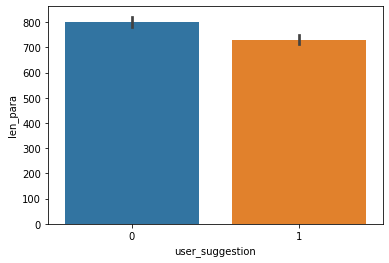

In [65]:
import seaborn as sns
sns.barplot(merged_data['user_suggestion'], merged_data['len_para'])

In [120]:
merged_data['num_para'] = merged_data['user_review'].apply(lambda x:len(x.split(".")))
merged_data['num_para'].describe()

count    17494.000000
mean         9.938036
std         61.899085
min          1.000000
25%          4.000000
50%          6.000000
75%         11.000000
max       7883.000000
Name: num_para, dtype: float64

In [104]:
merged_data.drop(merged_data[merged_data['len_para'] > 7995].index, inplace=True)

In [18]:
from catboost import CatBoostClassifier

In [27]:
model = CatBoostClassifier(loss_function='Logloss', verbose=True, iterations=500, depth=3, learning_rate=0.08)

In [28]:
model.fit(X_train,y_train,plot=False)

0:	learn: 0.6712720	total: 7.68s	remaining: 1h 3m 51s
1:	learn: 0.6555069	total: 13.7s	remaining: 56m 39s
2:	learn: 0.6396338	total: 16s	remaining: 44m 11s
3:	learn: 0.6267556	total: 18.5s	remaining: 38m 10s
4:	learn: 0.6149960	total: 20.7s	remaining: 34m 9s
5:	learn: 0.6062062	total: 22.9s	remaining: 31m 26s
6:	learn: 0.5968563	total: 25.3s	remaining: 29m 44s
7:	learn: 0.5901270	total: 27.6s	remaining: 28m 15s
8:	learn: 0.5849051	total: 30.2s	remaining: 27m 27s
9:	learn: 0.5790315	total: 32.8s	remaining: 26m 49s
10:	learn: 0.5734261	total: 35.2s	remaining: 26m 5s
11:	learn: 0.5695625	total: 37.5s	remaining: 25m 26s
12:	learn: 0.5654106	total: 39.7s	remaining: 24m 45s
13:	learn: 0.5618178	total: 41.7s	remaining: 24m 7s
14:	learn: 0.5584786	total: 43.8s	remaining: 23m 34s
15:	learn: 0.5546137	total: 46s	remaining: 23m 10s
16:	learn: 0.5514880	total: 48s	remaining: 22m 44s
17:	learn: 0.5482357	total: 50.1s	remaining: 22m 21s
18:	learn: 0.5454076	total: 52.1s	remaining: 21m 59s
19:	learn:

153:	learn: 0.4017910	total: 5m 36s	remaining: 12m 36s
154:	learn: 0.4012167	total: 5m 38s	remaining: 12m 34s
155:	learn: 0.4006849	total: 5m 40s	remaining: 12m 31s
156:	learn: 0.4000789	total: 5m 42s	remaining: 12m 29s
157:	learn: 0.3995333	total: 5m 44s	remaining: 12m 26s
158:	learn: 0.3989567	total: 5m 46s	remaining: 12m 24s
159:	learn: 0.3984210	total: 5m 48s	remaining: 12m 21s
160:	learn: 0.3979103	total: 5m 50s	remaining: 12m 18s
161:	learn: 0.3973752	total: 5m 52s	remaining: 12m 16s
162:	learn: 0.3967734	total: 5m 54s	remaining: 12m 13s
163:	learn: 0.3962328	total: 5m 56s	remaining: 12m 11s
164:	learn: 0.3956789	total: 5m 58s	remaining: 12m 8s
165:	learn: 0.3951347	total: 6m	remaining: 12m 6s
166:	learn: 0.3945553	total: 6m 2s	remaining: 12m 3s
167:	learn: 0.3939797	total: 6m 4s	remaining: 12m 1s
168:	learn: 0.3934340	total: 6m 6s	remaining: 11m 58s
169:	learn: 0.3928686	total: 6m 8s	remaining: 11m 56s
170:	learn: 0.3923883	total: 6m 11s	remaining: 11m 54s
171:	learn: 0.3918801	

304:	learn: 0.3358130	total: 11m 24s	remaining: 7m 17s
305:	learn: 0.3355989	total: 11m 27s	remaining: 7m 15s
306:	learn: 0.3351924	total: 11m 29s	remaining: 7m 13s
307:	learn: 0.3349618	total: 11m 33s	remaining: 7m 12s
308:	learn: 0.3345835	total: 11m 36s	remaining: 7m 10s
309:	learn: 0.3342822	total: 11m 38s	remaining: 7m 8s
310:	learn: 0.3339530	total: 11m 40s	remaining: 7m 5s
311:	learn: 0.3336250	total: 11m 43s	remaining: 7m 4s
312:	learn: 0.3333458	total: 11m 46s	remaining: 7m 2s
313:	learn: 0.3330236	total: 11m 48s	remaining: 6m 59s
314:	learn: 0.3327072	total: 11m 51s	remaining: 6m 57s
315:	learn: 0.3323637	total: 11m 53s	remaining: 6m 55s
316:	learn: 0.3320671	total: 11m 56s	remaining: 6m 53s
317:	learn: 0.3318654	total: 11m 59s	remaining: 6m 51s
318:	learn: 0.3316625	total: 12m 1s	remaining: 6m 49s
319:	learn: 0.3313107	total: 12m 3s	remaining: 6m 47s
320:	learn: 0.3309600	total: 12m 6s	remaining: 6m 44s
321:	learn: 0.3306411	total: 12m 9s	remaining: 6m 43s
322:	learn: 0.3303

455:	learn: 0.2957154	total: 18m 22s	remaining: 1m 46s
456:	learn: 0.2954494	total: 18m 24s	remaining: 1m 43s
457:	learn: 0.2952436	total: 18m 27s	remaining: 1m 41s
458:	learn: 0.2950551	total: 18m 30s	remaining: 1m 39s
459:	learn: 0.2948432	total: 18m 32s	remaining: 1m 36s
460:	learn: 0.2946287	total: 18m 34s	remaining: 1m 34s
461:	learn: 0.2943196	total: 18m 36s	remaining: 1m 31s
462:	learn: 0.2940830	total: 18m 39s	remaining: 1m 29s
463:	learn: 0.2939294	total: 18m 41s	remaining: 1m 27s
464:	learn: 0.2937297	total: 18m 44s	remaining: 1m 24s
465:	learn: 0.2935912	total: 18m 46s	remaining: 1m 22s
466:	learn: 0.2932035	total: 18m 49s	remaining: 1m 19s
467:	learn: 0.2931034	total: 18m 51s	remaining: 1m 17s
468:	learn: 0.2928369	total: 18m 54s	remaining: 1m 14s
469:	learn: 0.2925544	total: 18m 56s	remaining: 1m 12s
470:	learn: 0.2924490	total: 18m 58s	remaining: 1m 10s
471:	learn: 0.2921582	total: 19m	remaining: 1m 7s
472:	learn: 0.2919972	total: 19m 3s	remaining: 1m 5s
473:	learn: 0.291

In [29]:
y_pred = model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print('F1 Score:', np.round(
                        metrics.f1_score(y_test, 
                                               y_pred)))

Accuracy: 0.850257191846066
Precision: 0.8514728682170543
Recall: 0.8994431706518179
F1 Score: 1.0
